In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [3]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
5039,2022-05-27,195.190002
5040,2022-05-31,197.440002
5041,2022-06-01,192.910004
5042,2022-06-02,205.089996


In [4]:
df['Date']

0       2002-05-23
1       2002-05-24
2       2002-05-28
3       2002-05-29
4       2002-05-30
           ...    
5039    2022-05-27
5040    2022-05-31
5041    2022-06-01
5042    2022-06-02
5043    2022-06-03
Name: Date, Length: 5044, dtype: object

In [5]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
df

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
5039,2022-05-27,195.190002
5040,2022-05-31,197.440002
5041,2022-06-01,192.910004
5042,2022-06-02,205.089996


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
5039   2022-05-27
5040   2022-05-31
5041   2022-06-01
5042   2022-06-02
5043   2022-06-03
Name: Date, Length: 5044, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429
...,...
2022-05-27,195.190002
2022-05-31,197.440002
2022-06-01,192.910004


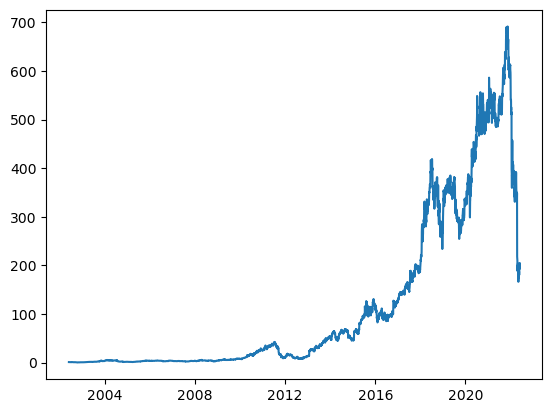

In [9]:
plt.plot(df.index, df['Close'])
plt.show()

In [10]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,523.109985,535.090027,520.809998,502.859985
1,2021-03-26,535.090027,520.809998,502.859985,508.049988
2,2021-03-29,520.809998,502.859985,508.049988,513.950012
3,2021-03-30,502.859985,508.049988,513.950012,513.390015
4,2021-03-31,508.049988,513.950012,513.390015,521.659973
...,...,...,...,...,...
247,2022-03-17,331.010010,343.750000,357.529999,371.399994
248,2022-03-18,343.750000,357.529999,371.399994,380.600006
249,2022-03-21,357.529999,371.399994,380.600006,374.589996
250,2022-03-22,371.399994,380.600006,374.589996,382.920013


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

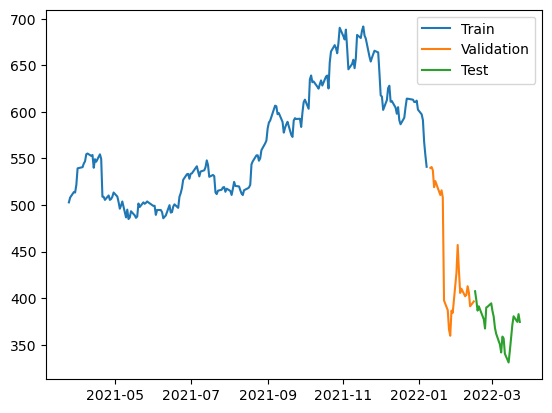

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mae',
              optimizer=Adam(learning_rate=0.001),
              metrics=['root_mean_squared_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - loss: 564.5876 - root_mean_squared_error: 566.6480 - val_loss: 440.4159 - val_root_mean_squared_error: 444.5989
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 564.2956 - root_mean_squared_error: 567.4990 - val_loss: 440.1405 - val_root_mean_squared_error: 444.3261
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 561.8249 - root_mean_squared_error: 565.7407 - val_loss: 439.7867 - val_root_mean_squared_error: 443.9756
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 562.3619 - root_mean_squared_error: 565.2755 - val_loss: 439.4011 - val_root_mean_squared_error: 443.5938
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 567.8705 - root_mean_squared_error: 571.0619 - val_loss: 438.9431 - val_root_mean_squared_error: 443.1411
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 561.4674 - root_mean_squared_error: 564.2888 - val_loss: 438.3160 - val_root_mean_squared_error: 442.5187
Epoch 7/200
7/7

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 53.7874 - root_mean_squared_error: 69.8398 - val_loss: 110.9064 - val_root_mean_squared_error: 126.4989
Epoch 43/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 55.4090 - root_mean_squared_error: 64.1774 - val_loss: 128.4850 - val_root_mean_squared_error: 142.1623
Epoch 44/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 52.9398 - root_mean_squared_error: 59.6378 - val_loss: 130.7183 - val_root_mean_squared_error: 144.1839
Epoch 45/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 53.2995 - root_mean_squared_error: 59.9317 - val_loss: 127.3265 - val_root_mean_squared_error: 141.1161
Epoch 46/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 51.2063 - root_mean_squared_error: 57.7149 - val_loss: 121.4361 - val_root_mean_squared_error: 135.8250
Epoch 47/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 51.0152 - root_mean_squared_error: 58.0476 - val_loss: 114.5204 - val_root_mean_squared_error: 129.6789
Epoch 48/200
7/7 ━━━━━━━━━━━━━━━━━━

Epoch 84/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 41.4564 - root_mean_squared_error: 50.9399 - val_loss: 100.2765 - val_root_mean_squared_error: 112.3077
Epoch 85/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45.7190 - root_mean_squared_error: 52.3455 - val_loss: 90.1630 - val_root_mean_squared_error: 103.8704
Epoch 86/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 42.3837 - root_mean_squared_error: 50.0610 - val_loss: 82.1879 - val_root_mean_squared_error: 96.7630
Epoch 87/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 39.5205 - root_mean_squared_error: 48.5968 - val_loss: 81.6062 - val_root_mean_squared_error: 94.8733
Epoch 88/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 44.7018 - root_mean_squared_error: 53.4177 - val_loss: 68.2935 - val_root_mean_squared_error: 80.9513
Epoch 89/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 44.1808 - root_mean_squared_error: 55.7394 - val_loss: 113.6597 - val_root_mean_squared_error: 123.2741
Epoch 90/200
7/7 ━━━━━━━━━━━━

Epoch 126/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.0081 - root_mean_squared_error: 20.0922 - val_loss: 43.8869 - val_root_mean_squared_error: 53.8120
Epoch 127/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.8675 - root_mean_squared_error: 21.9086 - val_loss: 43.6998 - val_root_mean_squared_error: 53.6188
Epoch 128/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.9274 - root_mean_squared_error: 19.6687 - val_loss: 50.4060 - val_root_mean_squared_error: 59.7645
Epoch 129/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 14.9156 - root_mean_squared_error: 17.8549 - val_loss: 44.4317 - val_root_mean_squared_error: 55.2195
Epoch 130/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.6674 - root_mean_squared_error: 20.0099 - val_loss: 43.1884 - val_root_mean_squared_error: 53.5979
Epoch 131/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13.1694 - root_mean_squared_error: 17.5500 - val_loss: 42.5249 - val_root_mean_squared_error: 52.5344
Epoch 132/200
7/7 ━━━━━━━━━━

Epoch 168/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.4264 - root_mean_squared_error: 10.7647 - val_loss: 39.2559 - val_root_mean_squared_error: 49.2912
Epoch 169/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.3553 - root_mean_squared_error: 10.3517 - val_loss: 40.5897 - val_root_mean_squared_error: 51.0415
Epoch 170/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0465 - root_mean_squared_error: 10.7579 - val_loss: 39.5068 - val_root_mean_squared_error: 49.8490
Epoch 171/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1357 - root_mean_squared_error: 10.4275 - val_loss: 39.0887 - val_root_mean_squared_error: 49.1829
Epoch 172/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.4640 - root_mean_squared_error: 11.0687 - val_loss: 43.3447 - val_root_mean_squared_error: 52.8873
Epoch 173/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4289 - root_mean_squared_error: 10.7521 - val_loss: 39.0894 - val_root_mean_squared_error: 48.8124
Epoch 174/200
7/7 ━━━━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


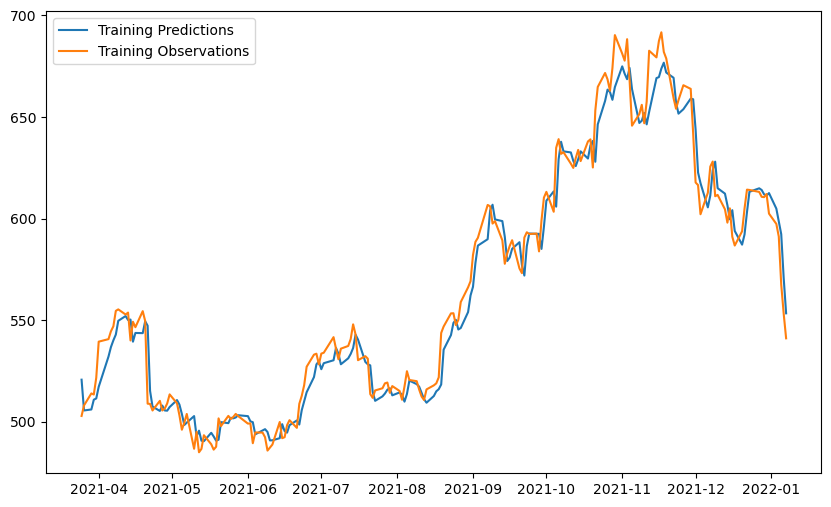

In [23]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10,6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


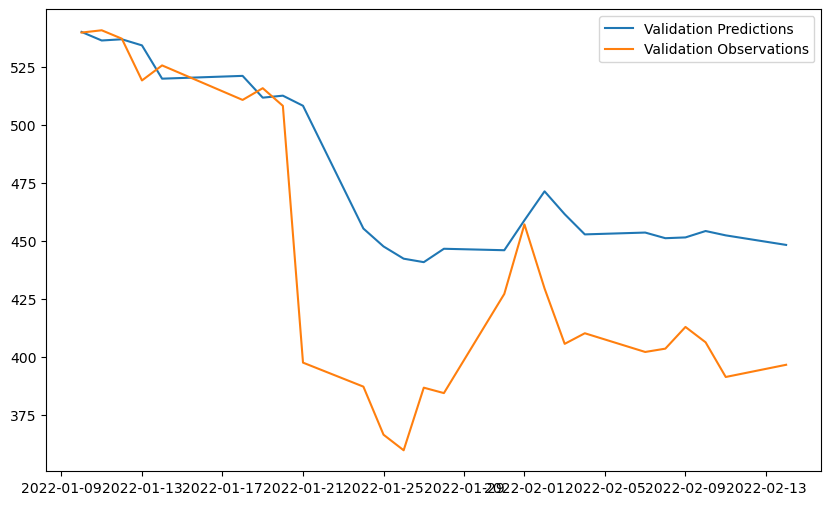

In [24]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10,6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


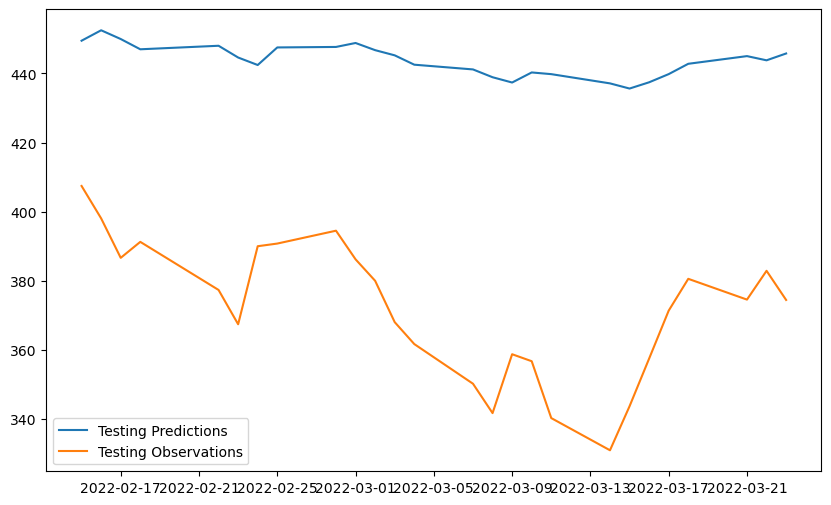

In [25]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10,6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

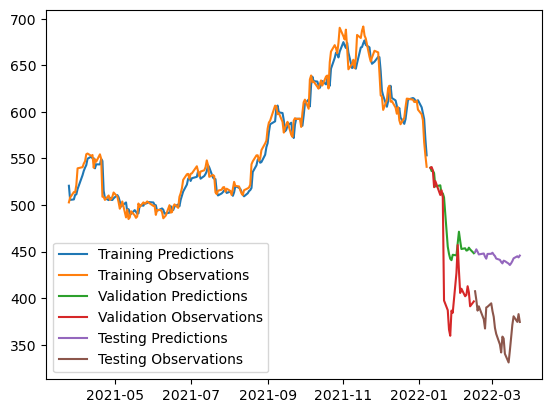

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.show()

In [27]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━

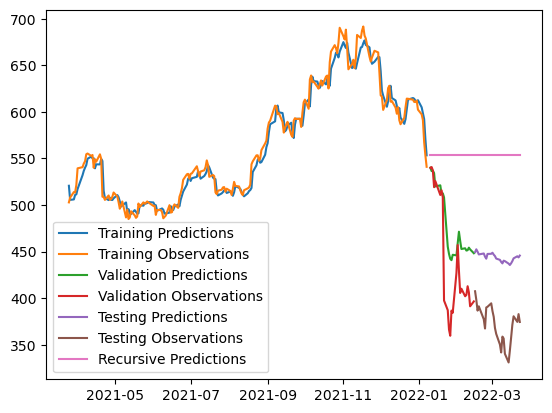

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
plt.show()